# **Music Data Analysis: Spotify API with Pandas and Altair**

This notebook illustrates how a user would utilize the Spotify API, Spotipy (a python package), and Pandas to construct a dataframe containing the tracks that constitue one or multiple playlists. 

After the data is parsed into a dataframe, we use Altair to chart some of it's series.

##**Part 1: Setting up**

###Step 1: installing the Spotipy application:

In [ ]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 932 kB/s 
     |████████████████████████████████| 139 kB 25.9 MB/s 
     |████████████████████████████████| 246 kB 53.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


###Step 2: importing Python Libraries

In [ ]:
import pandas as pd
import altair as alt
import requests
import inspect
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

###Step 3: providing user credentials (generated at developer.spotify.com)

In [ ]:
CLIENT_ID = "116bae2a86fd4737862816c5f45d4c36"
CLIENT_SECRET = "4f4a732d83d04cfa94acc26d2b77169f"
my_username = "sx47r9lq4dwrjx1r0ct9f9m09"

###Step 4: instantiating a Spotify client with the provided credentials

In [ ]:
# source: Max Hilsdorf
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

After this, we are ready to get data and perform analysis!

##**Part 2: Data Analysis**

We are able to get a playlist of a user through the sp.user_playlist_tracks(username, playlist) method and turning it into a Pandas dataFrame:

In [ ]:
# playlist_tracks(username: String, playlist_id: String): json_dict
playlist_tracks = pd.DataFrame(sp.user_playlist_tracks("sx47r9lq4dwrjx1r0ct9f9m09", "7KfWEjHxpcOIkqvDqMW5RV"))
playlist_tracks

,href,items,limit,next,offset,previous,total
0,https://api.spotify.com/v1/playlists/7KfWEjHxp...,"{'added_at': '2020-06-24T18:22:18Z', 'added_by...",100,None,0,None,17
1,https://api.spotify.com/v1/playlists/7KfWEjHxp...,"{'added_at': '2020-06-24T18:22:32Z', 'added_by...",100,None,0,None,17
2,https://api.spotify.com/v1/playlists/7KfWEjHxp...,"{'added_at': '2020-06-24T18:22:50Z', 'added_by...",100,None,0,None,17
3,https://api.spotify.com/v1/playlists/7KfWEjHxp...,"{'added_at': '2020-06-24T18:23:10Z', 'added_by...",100,None,0,None,17
4,https://api.spotify.com/v1/playlists/7KfWEjHxp...,"{'added_at': '2020-06-24T18:23:22Z', 'added_by...",100,None,0,None,17
5,https://api.spotify.com/v1/playlists/7KfWEjHxp...,"{'added_at': '2020-06-24T18:23:38Z', 'added_by...",100,None,0,None,17
6,https://api.spotify.com/v1/playlists/7KfWEjHxp...,"{'added_at': '2020-06-24T18:26:57Z', 'added_by...",100,None,0,None,17
7,https://api.spotify.com/v1/playlists/7KfWEjHxp...,"{'added_at': '2020-06-24T18:31:50Z', 'added_by...",100,None,0,None,17
8,https://api.spotify.com/v1/playlists/7KfWEjHxp...,"{'added_at': '2020-06-24T18:35:09Z', 'added_by...",100,None,0,None,17
9,https://api.spotify.com/v1/playlists/7KfWEjHxp...,"{'added_at': '2020-06-24T18:38:34Z', 'added_by...",100,None,0,None,17


We can take a look an individual track here:

In [ ]:
sample_track = playlist_tracks.iloc[0]["items"]["track"]
sample_track

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5EvFsr3kj42KNv97ZEnqij'},
    'href': 'https://api.spotify.com/v1/artists/5EvFsr3kj42KNv97ZEnqij',
    'id': '5EvFsr3kj42KNv97ZEnqij',
    'name': 'Shaggy',
    'type': 'artist',
    'uri': 'spotify:artist:5EvFsr3kj42KNv97ZEnqij'}],
  'available_markets': ['AD',
   'AE',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HU',
   'ID',
   'IE',
   'IL',
   'IN',
   'IQ',
   'IS',
   'I

Using sp.audio_features(track_id), it's possible to obtain a given track's audio features

In [ ]:
sample_track_audio_features = pd.DataFrame(sp.audio_features(sample_track["id"]))
sample_track_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.867,0.538,2,-16.183,1,0.361,0.242,0.000017,0.316,0.781,158.328,audio_features,4fxF8ljwryMZX5c9EKrLFE,spotify:track:4fxF8ljwryMZX5c9EKrLFE,https://api.spotify.com/v1/tracks/4fxF8ljwryMZ...,https://api.spotify.com/v1/audio-analysis/4fxF...,249933,4


Using the below function (courtesy of Max Hilsdorf), we can loop through the items of a playlist and get every track's features of interest, along with it's audio features

In [ ]:
# this function is created based on Max Hilsdorf's
# source: https://towardsdatascience.com/how-to-create-large-music-datasets-using-spotipy-40e7242cc6a6

def get_audio_features_df(playlist):
    
    # Create empty dataframe
    playlist_features_list = ["artist", "album", "track_name", "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    for track in playlist["items"]:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [ ]:
audio_features_df = get_audio_features_df(playlist_tracks)
audio_features_df

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Shaggy,Boombastic,Boombastic,4fxF8ljwryMZX5c9EKrLFE,0.867,0.538,2,-16.183,1,0.3610,0.000017,0.3160,0.781,158.328,249933,4
1,Ini Kamoze,Here Comes The Hotstepper,Here Comes the Hotstepper - Heartical Mix,3QRM0qZB7oMYavveH0iEqx,0.889,0.454,4,-8.598,0,0.2210,0.000186,0.2030,0.436,100.360,250467,4
2,Shaggy,Boombastic,In The Summertime,726KAdf3k8Ce8W95O38XNI,0.734,0.684,1,-13.822,1,0.2270,0.000000,0.0497,0.962,173.607,238360,4
3,Afroman,Waiting to Inhale,Colt 40ty Fiva,3hody5PjTIzwoiV3hnAvWL,0.666,0.751,0,-5.355,0,0.2160,0.000000,0.2940,0.607,175.891,201440,4
4,Salt-N-Pepa,Very Necessary,Shoop,0Pu71wxadDlB8fJXfjIjeJ,0.939,0.675,0,-7.232,1,0.2110,0.000000,0.0565,0.795,96.918,248573,4
5,Shaggy,The Boombastic Collection - Best of Shaggy,It Wasn't Me,0OaunKfsxkgBvPv68jBbmm,0.852,0.604,0,-4.569,1,0.0642,0.000000,0.3270,0.667,94.762,227547,4
6,House Of Pain,House of Pain (Fine Malt Lyrics),Jump Around,3TZwjdclvWt7iPJUnMpgcs,0.854,0.710,4,-6.320,0,0.0793,0.000087,0.1660,0.818,106.894,214947,4
7,Vanilla Ice,Ice Ice Baby,Ice Ice Baby - Radio Edit,3sy0rren2cVFNfkDxa0q2e,0.977,0.488,2,-15.962,1,0.1200,0.000000,0.0826,0.770,115.726,231773,4
8,Beastie Boys,Ill Communication,Sure Shot,21REQ1bCUWphT2QK3bLWYQ,0.692,0.799,1,-7.924,1,0.1640,0.000000,0.3010,0.549,97.978,199667,4
9,Afroman,The Good Times,Crazy Rap (Colt 45 & 2 Zig Zags),1ACZpHI5vZ5Ea4xGlkdGWM,0.927,0.367,9,-7.797,1,0.3820,0.000000,0.1320,0.576,99.053,328667,4


Next, we can graphically display our results using Altair:

In [ ]:
alt.Chart(audio_features_df).mark_point().encode(
    x='loudness',
    y='tempo'
)

alt.Chart(...)

Similarly, we can obtain ALL tracks of a given user by their username:

In [ ]:
# preserve the name of the playlist in the dataframe
def get_all_user_tracks(username):
  all_my_playlists = pd.DataFrame(sp.user_playlists(username))
  list_of_dataframes = []

  for playlist in all_my_playlists.index:
    current_playlist = pd.DataFrame(sp.user_playlist_tracks(username, all_my_playlists["items"][playlist]["id"]))
    current_playlist_audio = get_audio_features_df(current_playlist)
    if all_my_playlists["items"][playlist]["name"]:
      current_playlist_audio["playlist_name"] = all_my_playlists["items"][playlist]["name"]
    else:
       current_playlist_audio["playlist_name"] = None
    list_of_dataframes.append(current_playlist_audio)

  return pd.concat(list_of_dataframes)
    

In [ ]:
all_my_tracks = get_all_user_tracks(my_username)

In [ ]:
all_my_tracks

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_name
0,alt-J,This Is All Yours,Left Hand Free,4iEOVEULZRvmzYSZY2ViKN,0.697,0.877,3,-4.465,1,0.0462,0.00943,0.083,0.802,101.990,173631,4,Alternative & Indie
1,Cage The Elephant,Cage The Elephant (Expanded Edition),Ain't No Rest for the Wicked,3Pzh926pXggbMe2ZpXyMV7,0.636,0.849,0,-7.075,1,0.1060,0.0,0.372,0.917,156.036,175493,4,Alternative & Indie
2,Cage The Elephant,Cage The Elephant (Expanded Edition),Back Against the Wall,0vz64VTiPPBpcmla0QvAI9,0.598,0.743,1,-6.163,1,0.0305,0.0,0.112,0.534,110.334,228320,4,Alternative & Indie
3,The Kooks,Listen,Bad Habit,3huV7eiNpaQlCB3LbZi9bB,0.733,0.882,0,-4.199,0,0.0389,0.00001,0.131,0.854,123.071,221413,4,Alternative & Indie
4,Weezer,Weezer (Green Album),Island In The Sun,2MLHyLy5z5l5YRp7momlgw,0.654,0.810,4,-6.260,0,0.0288,0.00251,0.165,0.661,114.623,200307,4,Alternative & Indie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,The Band,Music From Big Pink (Remastered),The Weight - Remastered 2000,0P7DoyGrr4Wp9w5TotEtUC,0.630,0.551,9,-9.280,1,0.0549,0.000058,0.103,0.518,143.868,274493,4,good shit
83,BabyJake,Cigarettes On Patios,Cigarettes On Patios,0LJDFZohBgWOMvXQw0cc9W,0.752,0.712,4,-5.467,0,0.0474,0.0,0.136,0.588,139.999,207813,4,good shit
84,24kGoldn,Mood (feat. iann dior),Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,0.700,0.722,7,-3.558,0,0.0369,0.0,0.272,0.756,90.989,140526,4,good shit
85,Miike Snow,Happy To You,Paddling Out,2egGsu9X7zdNJxU9Kftq6l,0.599,0.818,10,-3.652,0,0.0394,0.00571,0.297,0.366,128.159,217960,4,good shit


Then, we can chart our results:

In [ ]:
alt.Chart(all_my_tracks).mark_point().encode(
    x="liveness",
    y="danceability",
    color="playlist_name"
)

alt.Chart(...)

In [ ]:
avas_playlist_df = pd.DataFrame(sp.playlist_items("3tt4ET474Xr1uOPgNz8jAY"))
avas_playlist_df

,href,items,limit,next,offset,previous,total
0,https://api.spotify.com/v1/playlists/3tt4ET474...,"{'added_at': '2020-06-16T16:43:01Z', 'added_by...",100,None,0,None,60
1,https://api.spotify.com/v1/playlists/3tt4ET474...,"{'added_at': '2020-06-16T16:44:10Z', 'added_by...",100,None,0,None,60
2,https://api.spotify.com/v1/playlists/3tt4ET474...,"{'added_at': '2020-06-16T17:02:14Z', 'added_by...",100,None,0,None,60
3,https://api.spotify.com/v1/playlists/3tt4ET474...,"{'added_at': '2020-06-19T03:30:59Z', 'added_by...",100,None,0,None,60
4,https://api.spotify.com/v1/playlists/3tt4ET474...,"{'added_at': '2020-06-19T04:26:10Z', 'added_by...",100,None,0,None,60
5,https://api.spotify.com/v1/playlists/3tt4ET474...,"{'added_at': '2020-06-19T12:19:20Z', 'added_by...",100,None,0,None,60
6,https://api.spotify.com/v1/playlists/3tt4ET474...,"{'added_at': '2020-06-24T01:41:49Z', 'added_by...",100,None,0,None,60
7,https://api.spotify.com/v1/playlists/3tt4ET474...,"{'added_at': '2020-07-12T13:52:34Z', 'added_by...",100,None,0,None,60
8,https://api.spotify.com/v1/playlists/3tt4ET474...,"{'added_at': '2020-07-12T20:49:27Z', 'added_by...",100,None,0,None,60
9,https://api.spotify.com/v1/playlists/3tt4ET474...,"{'added_at': '2020-07-12T20:54:49Z', 'added_by...",100,None,0,None,60


In [ ]:
avas_audio_features_df = get_audio_features_df(avas_playlist_df)
avas_audio_features_df

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Princess Nokia,Gemini - A COLORS SHOW,Gemini - A COLORS SHOW,0KHRpftQXPXk1ZJrBRjbu7,0.707,0.52600,9,-8.016,1,0.4030,0.000001,0.1200,0.8090,80.312,184827,4
1,Alice Phoebe Lou,Witches,Witches,4CZgaNdobtnTfBevPBje0c,0.576,0.71900,8,-5.749,1,0.0583,0.000005,0.1160,0.7290,73.122,195079,4
2,Japanese Breakfast,Soft Sounds from Another Planet,Boyish,0De8H4o9xzPtjRp9dns0L5,0.227,0.45700,2,-7.459,1,0.0299,0.000447,0.1890,0.3710,106.727,213987,4
3,Elvis Presley,Elvis 30 #1 Hits,Can't Help Falling In Love,4hAUynwghvrqDXs1ejKNEq,0.438,0.32500,2,-11.066,1,0.0268,0.000005,0.1070,0.3620,101.577,177840,3
4,King Princess,Prophet,Prophet,4vFTpKeY2F3ckwhULrtS0z,0.502,0.78300,7,-4.718,1,0.1050,0.000464,0.0990,0.6260,165.996,249773,4
5,Alaina Castillo,mensajes de voz,un niño,1TXeqjCYIahhfooXkdb3aI,0.493,0.29600,7,-5.598,0,0.0761,0.000000,0.0957,0.3510,197.707,185682,3
6,James Taylor,Greatest Hits,Fire and Rain,1XUKItaRs2494LclJwHhl8,0.611,0.35000,5,-14.480,1,0.0356,0.000008,0.0844,0.3600,76.064,200579,4
7,Esperanza Spalding,12 Little Spells (Deluxe Edition),12 Little Spells (thoracic spine),0ZoE1JZG6cqjckvvUBqHrT,0.425,0.42900,4,-11.290,1,0.0370,0.000069,0.2190,0.0517,125.728,293053,4
8,Clairo,Immunity,Softly,4PvbbMYL4fkToni5BLaYRb,0.759,0.43600,0,-11.233,0,0.0419,0.011300,0.1020,0.7820,94.030,185307,4
9,Faye Webster,Atlanta Millionaires Club,Kingston,0EDQwboQDmswDRn58wcslg,0.729,0.34400,10,-9.541,0,0.0395,0.001070,0.1340,0.5430,142.130,202160,4


In [ ]:
avas_energy = avas_audio_features_df.sort_values(by=['energy', "danceability"])
print(avas_energy["track_name"])

alt.Chart(avas_energy).mark_point().encode(
    x=alt.X("track_name", sort=None),
    y=alt.Y("energy"),
    tooltip=["artist", "track_name"]
)


40                Quando gli alberi incontrano il vento
39               Sweet Dreams (Of You) - Single Version
10                                          Sea of Love
26                          Cayendo (Side A - Acoustic)
23                                             Illusion
59                          Girl from the North Country
52                                           Crazy Love
50                          I'll Be Here in the Morning
42                                I Met Him On A Sunday
45                                    I Remember - Live
22                       Love Song - Helado Negro Remix
36                 Heaven On A Sunday - Remastered 2020
58                                         Day Dreaming
57                            Thank You - 2008 Remaster
53                                   These Arms of Mine
43                                A Sunday Kind Of Love
48                                                 Work
5                                               

alt.Chart(...)

In [ ]:
gs_playlist_tracks = pd.DataFrame(sp.user_playlist_tracks("sx47r9lq4dwrjx1r0ct9f9m09", "47VfnY1RsMOadBdy9MCDYW"))
gs_playlist_tracks_audio_df = get_audio_features_df(gs_playlist_tracks)
gs_playlist_tracks_audio_df["Author"] = "oleh"
avas_audio_features_df["Author"] = "ava"
two_playlists_combined = pd.concat([gs_playlist_tracks_audio_df, avas_audio_features_df])
two_playlists_combined

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Author
0,Prince,Purple Rain,Purple Rain,54X78diSLoUDI3joC2bjMz,0.367,0.452,10,-10.422,1,0.0307,0.002280,0.6890,0.189,113.066,520787,4,oleh
1,Bob Dylan,Pat Garrett & Billy The Kid (Soundtrack From T...,Knockin' On Heaven's Door,6HSXNV0b4M4cLJ7ljgVVeh,0.513,0.396,7,-13.061,1,0.0299,0.177000,0.1100,0.229,140.208,149880,4,oleh
2,The Beatles,Abbey Road (Remastered),Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,0.557,0.540,9,-10.484,1,0.0347,0.002480,0.1790,0.394,129.171,185733,4,oleh
3,David Gilmour,Live in Gdansk,Wish You Were Here - Live in Gdańsk,2q0BviPG80XxEkaCJCrBm8,0.526,0.472,7,-13.148,1,0.0370,0.000030,0.9820,0.339,124.443,314387,4,oleh
4,Chris Cornell,Chris Cornell (Deluxe Edition),Nothing Compares 2 U - Live At SiriusXM/2015,0tUELgOuOJ3KCsYMDDsNvD,0.434,0.327,0,-10.720,1,0.0312,0.000002,0.6860,0.295,119.506,303907,4,oleh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,Angèle,Brol La Suite,Oui ou non,7rBP4bLjMLNkix1nGHjheP,0.649,0.574,2,-7.856,1,0.1430,0.000013,0.1610,0.361,199.906,196800,4,ava
56,Jim Croce,You Don't Mess Around With Jim,Walkin' Back to Georgia,51ueZKM83MTRv9rgiDfI6Y,0.661,0.518,6,-10.061,0,0.0319,0.000018,0.0953,0.776,127.266,170760,4,ava
57,Bonnie Raitt,Bonnie Raitt (2008 Remaster),Thank You - 2008 Remaster,2zLIjfjQ8kMy7WSSLmF0I2,0.670,0.279,5,-15.589,1,0.0289,0.008790,0.1090,0.552,77.820,170800,4,ava
58,Aretha Franklin,"Young, Gifted and Black",Day Dreaming,7L4G39PVgMfaeHRyi1ML7y,0.463,0.273,0,-15.364,0,0.0740,0.000367,0.1010,0.293,146.426,239960,4,ava


In [ ]:
alt.Chart(two_playlists_combined).mark_point().encode(
    x=alt.X("track_id", sort=None),
    y='tempo',
    color="Author",
    tooltip=["artist", "track_name"]
).properties(
    width=1000
)

alt.Chart(...)

In [ ]:
G=nx.from_pandas_edgelist(two_playlists_combined, "track_name", "danceability")
G

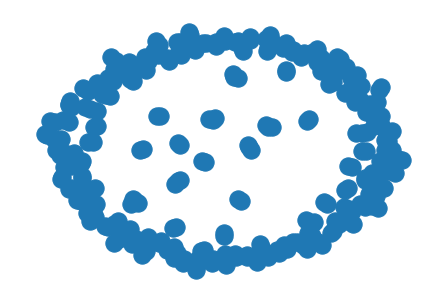

In [ ]:
nx.draw(G)

In [ ]:

partition = community_louvain.best_partition(G)
partition

{0.227: 57,
 0.278: 124,
 0.321: 115,
 0.326: 109,
 0.33: 35,
 0.331: 117,
 0.35: 93,
 0.354: 37,
 0.359: 119,
 0.366: 6,
 0.367: 0,
 0.37: 95,
 0.372: 17,
 0.39: 94,
 0.391: 96,
 0.402: 11,
 0.403: 10,
 0.417: 101,
 0.421: 121,
 0.425: 62,
 0.427: 54,
 0.432: 14,
 0.434: 8,
 0.438: 18,
 0.441: 9,
 0.445: 97,
 0.458: 90,
 0.463: 29,
 0.468: 100,
 0.47: 123,
 0.482: 38,
 0.493: 61,
 0.496: 13,
 0.5: 70,
 0.502: 58,
 0.509: 91,
 0.511: 15,
 0.513: 3,
 0.514: 79,
 0.523: 114,
 0.526: 7,
 0.527: 41,
 0.53: 33,
 0.534: 78,
 0.54: 60,
 0.541: 107,
 0.543: 30,
 0.544: 113,
 0.545: 73,
 0.547: 82,
 0.551: 12,
 0.557: 5,
 0.558: 2,
 0.561: 69,
 0.565: 24,
 0.572: 23,
 0.575: 22,
 0.576: 55,
 0.581: 102,
 0.589: 4,
 0.591: 36,
 0.593: 126,
 0.594: 16,
 0.595: 83,
 0.597: 26,
 0.598: 116,
 0.599: 48,
 0.602: 72,
 0.605: 56,
 0.607: 31,
 0.608: 20,
 0.611: 32,
 0.612: 80,
 0.613: 88,
 0.615: 1,
 0.63: 42,
 0.632: 77,
 0.636: 67,
 0.638: 39,
 0.64: 86,
 0.645: 28,
 0.648: 89,
 0.649: 63,
 0.653: 40

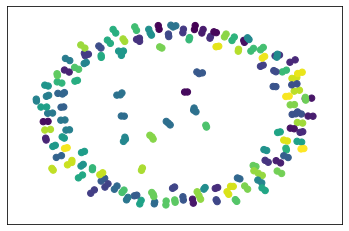

In [ ]:
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
all_my_tracks

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_name
0,alt-J,This Is All Yours,Left Hand Free,4iEOVEULZRvmzYSZY2ViKN,0.697,0.877,3,-4.465,1,0.0462,0.00943,0.083,0.802,101.990,173631,4,Alternative & Indie
1,Cage The Elephant,Cage The Elephant (Expanded Edition),Ain't No Rest for the Wicked,3Pzh926pXggbMe2ZpXyMV7,0.636,0.849,0,-7.075,1,0.1060,0.0,0.372,0.917,156.036,175493,4,Alternative & Indie
2,Cage The Elephant,Cage The Elephant (Expanded Edition),Back Against the Wall,0vz64VTiPPBpcmla0QvAI9,0.598,0.743,1,-6.163,1,0.0305,0.0,0.112,0.534,110.334,228320,4,Alternative & Indie
3,The Kooks,Listen,Bad Habit,3huV7eiNpaQlCB3LbZi9bB,0.733,0.882,0,-4.199,0,0.0389,0.00001,0.131,0.854,123.071,221413,4,Alternative & Indie
4,Weezer,Weezer (Green Album),Island In The Sun,2MLHyLy5z5l5YRp7momlgw,0.654,0.810,4,-6.260,0,0.0288,0.00251,0.165,0.661,114.623,200307,4,Alternative & Indie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,The Band,Music From Big Pink (Remastered),The Weight - Remastered 2000,0P7DoyGrr4Wp9w5TotEtUC,0.630,0.551,9,-9.280,1,0.0549,0.000058,0.103,0.518,143.868,274493,4,good shit
83,BabyJake,Cigarettes On Patios,Cigarettes On Patios,0LJDFZohBgWOMvXQw0cc9W,0.752,0.712,4,-5.467,0,0.0474,0.0,0.136,0.588,139.999,207813,4,good shit
84,24kGoldn,Mood (feat. iann dior),Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,0.700,0.722,7,-3.558,0,0.0369,0.0,0.272,0.756,90.989,140526,4,good shit
85,Miike Snow,Happy To You,Paddling Out,2egGsu9X7zdNJxU9Kftq6l,0.599,0.818,10,-3.652,0,0.0394,0.00571,0.297,0.366,128.159,217960,4,good shit


In [ ]:
alt.Chart(all_my_tracks).mark_point().encode(
    x=alt.X("track_name", sort=None),
    y='energy',
    color="playlist_name",
    tooltip=["artist", "track_name", "playlist_name"]
).properties(
    width=1200
)

alt.Chart(...)

In [ ]:
# all_avas_tracks = get_all_user_tracks("ava.panetto")
# all_avas_tracks
list_of_avas_playlists = []
avas_export_playlists_list = ["69bvktIqRHFk56zJLFu3ms", 
                              "5nGnFuPH2G1e2lZwji2qxy",
                              "1H715wD7rkVCSGz0fwtLeH",
                              "35DLrFVs4dK3QreeuQt9vZ",
                              "0N6HSTGQcNhgrsjvdgqjH9",
                              "1BwJKfuRNrnfdkvIpaaSHH",
                              "6AfdBAcUHElsK8cRzMpnc1"]

for item in avas_export_playlists_list:
  temp_playlist_df = pd.DataFrame(sp.playlist_items(item))
  temp_playlist_audio = get_audio_features_df(temp_playlist_df)
  temp_playlist_audio["playlist_name"] = sp.playlist(item)["name"]
  temp_playlist_audio["Author"] = "ava"
  list_of_avas_playlists.append(temp_playlist_audio)

len(list_of_avas_playlists)
  
# avas_playlist_df = pd.DataFrame(sp.playlist_items("3tt4ET474Xr1uOPgNz8jAY"))
# # pd.DataFrame(sp.user_playlist_tracks(username, all_my_playlists["items"][playlist]["id"]))
# avas_playlist_df
# avas_audio_features_df = get_audio_features_df(avas_playlist_df)
# avas_audio_features_df

7

In [ ]:
list_of_avas_playlists[0]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_name,Author
0,Hank Williams,The Lost Highway,I'm So Lonesome I Could Cry,70vu63PQhtdtIA9fobUsSo,0.631,0.1360,4,-14.059,1,0.0289,0.003960,0.1200,0.496,111.345,168938,3,Ben’s guide to country,ava
1,Hank Williams,40 Greatest Hits,Your Cheatin' Heart - Single Version,3PIZKsovCCVX3XaxKSzkdY,0.666,0.1290,0,-17.210,1,0.0322,0.000005,0.3330,0.562,128.054,163507,4,Ben’s guide to country,ava
2,Tammy Wynette,The Essential Tammy Wynette,D-I-V-O-R-C-E,4JPEuPsDG3nNJMAvvQ2Rr3,0.628,0.3830,9,-9.216,1,0.0296,0.000000,0.1510,0.564,99.789,175440,4,Ben’s guide to country,ava
3,Tammy Wynette,Tears Of Fire: The 25th Anniversary Collection,I Don't Wanna Play House - Single Version,7t3MMuqOyL1t9NzIlMyKFJ,0.574,0.2580,2,-13.049,1,0.0319,0.000000,0.1500,0.405,100.994,155227,4,Ben’s guide to country,ava
4,George Jones,Super Hits,He Stopped Loving Her Today,6qMgx8ys4MNNxypaIvbG0i,0.430,0.1730,8,-18.597,1,0.0321,0.000111,0.2240,0.365,72.103,195333,4,Ben’s guide to country,ava
5,Merle Haggard,The Essential Merle Haggard: The Epic Years,Pancho and Lefty,2hckAvL66faAcR0Fk64hj6,0.693,0.4540,2,-12.440,1,0.0332,0.000154,0.1430,0.540,122.641,287627,4,Ben’s guide to country,ava
6,Loretta Lynn,Honky Tonk Girl: The Loretta Lynn Collection,The Pill - Single Version,6UcwSMzXbiVCSk4QRbqo27,0.689,0.3340,5,-10.334,1,0.0355,0.000000,0.0820,0.800,77.858,158960,4,Ben’s guide to country,ava
7,Loretta Lynn,Honky Tonk Girl: The Loretta Lynn Collection,These Boots Are Made For Walking,3Sh09KjwfjmhORIzGl9Njc,0.688,0.7160,1,-8.047,1,0.1060,0.000008,0.1300,0.902,166.230,142867,4,Ben’s guide to country,ava
8,Loretta Lynn,You Ain't Woman Enough,You Ain't Woman Enough,5XOM6Neo5IACRMhvd2ibKA,0.744,0.4550,8,-7.543,1,0.0366,0.000000,0.0526,0.905,75.281,135160,4,Ben’s guide to country,ava
9,Merle Haggard,Mama Tried/ Pride In What I Am,Mama Tried,6h3YJ05BovN1Pgk145J3r9,0.738,0.5380,2,-10.118,1,0.0374,0.000013,0.0653,0.810,97.487,134453,4,Ben’s guide to country,ava


In [ ]:
list_of_avas_playlists.append(avas_audio_features_df)

In [ ]:
list_of_avas_playlists[1]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_name,Author
0,Amy Winehouse,At The BBC,Stronger Than Me - Live On Later... With Jools...,7op4mx4y4ON4qT7pZnNM7u,0.782,0.506,9,-8.184,0,0.1290,0.000056,0.9790,0.748,91.075,230573,4,Lioness Records,ava
1,Amy Winehouse,Back To Black (Deluxe Edition),"Valerie - Live At BBC Radio 1 Live Lounge, Lon...",6nLvaCZFR1wEzW3sIKpsnr,0.772,0.371,5,-5.743,0,0.0348,0.000000,0.1670,0.684,96.574,233733,4,Lioness Records,ava
2,Amy Winehouse,Frank,October Song,4fR7KDVELb9rpN6YnDanwu,0.557,0.835,0,-7.654,1,0.2760,0.113000,0.0399,0.690,144.374,204920,3,Lioness Records,ava
3,Amy Winehouse,Frank,You Sent Me Flying / Cherry,6er2NooPYkjTO3vXp9QAz6,0.549,0.623,0,-6.516,0,0.2470,0.000000,0.1000,0.290,99.749,409760,4,Lioness Records,ava
4,Amy Winehouse,Back To Black (Deluxe Edition),Me & Mr Jones,0RfzQhbvtn5lOaKdhpAni7,0.583,0.486,4,-13.165,1,0.0759,0.000000,0.0665,0.513,87.837,153173,4,Lioness Records,ava
5,Amy Winehouse,AMY (Original Motion Picture Soundtrack),Love Is A Losing Game - Live At The Mercury Mu...,1DYCdxNAVNUCAOlAi7aP5o,0.511,0.254,0,-9.440,1,0.0331,0.000165,0.0996,0.247,88.421,152093,4,Lioness Records,ava
6,Amy Winehouse,Back To Black (Deluxe Edition),He Can Only Hold Her,3eVo0wD4kGwF3gshtecZso,0.626,0.504,11,-14.978,1,0.0730,0.008430,0.0684,0.713,98.391,166400,4,Lioness Records,ava
7,Amy Winehouse,Lioness: Hidden Treasures,Will You Still Love Me Tomorrow? - 2011,5TiDasAFs5gwEx52NEcDhs,0.569,0.632,0,-4.538,1,0.0257,0.000231,0.1340,0.286,93.239,262813,4,Lioness Records,ava
8,Amy Winehouse,At The BBC,He Can Only Hold Her - Live At Porchester Hall...,63GyGK1Xn6nolMAz0hOk7J,0.546,0.732,11,-6.903,0,0.1640,0.000000,0.9460,0.576,101.221,195240,4,Lioness Records,ava
9,Amy Winehouse,At The BBC,Tears Dry On Their Own - Live On Later... With...,6p5rDpiFAwFqopcLP1cXIn,0.458,0.857,1,-6.863,0,0.2960,0.000000,0.9730,0.659,120.509,204507,4,Lioness Records,ava


In [ ]:
avas_eight_playlists = pd.concat(list_of_avas_playlists)

In [ ]:
avas_eight_playlists

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_name,Author
0,Hank Williams,The Lost Highway,I'm So Lonesome I Could Cry,70vu63PQhtdtIA9fobUsSo,0.631,0.136,4,-14.059,1,0.0289,0.003960,0.1200,0.496,111.345,168938,3,Ben’s guide to country,ava
1,Hank Williams,40 Greatest Hits,Your Cheatin' Heart - Single Version,3PIZKsovCCVX3XaxKSzkdY,0.666,0.129,0,-17.210,1,0.0322,0.000005,0.3330,0.562,128.054,163507,4,Ben’s guide to country,ava
2,Tammy Wynette,The Essential Tammy Wynette,D-I-V-O-R-C-E,4JPEuPsDG3nNJMAvvQ2Rr3,0.628,0.383,9,-9.216,1,0.0296,0.000000,0.1510,0.564,99.789,175440,4,Ben’s guide to country,ava
3,Tammy Wynette,Tears Of Fire: The 25th Anniversary Collection,I Don't Wanna Play House - Single Version,7t3MMuqOyL1t9NzIlMyKFJ,0.574,0.258,2,-13.049,1,0.0319,0.000000,0.1500,0.405,100.994,155227,4,Ben’s guide to country,ava
4,George Jones,Super Hits,He Stopped Loving Her Today,6qMgx8ys4MNNxypaIvbG0i,0.430,0.173,8,-18.597,1,0.0321,0.000111,0.2240,0.365,72.103,195333,4,Ben’s guide to country,ava
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,Angèle,Brol La Suite,Oui ou non,7rBP4bLjMLNkix1nGHjheP,0.649,0.574,2,-7.856,1,0.1430,0.000013,0.1610,0.361,199.906,196800,4,NaN,ava
56,Jim Croce,You Don't Mess Around With Jim,Walkin' Back to Georgia,51ueZKM83MTRv9rgiDfI6Y,0.661,0.518,6,-10.061,0,0.0319,0.000018,0.0953,0.776,127.266,170760,4,NaN,ava
57,Bonnie Raitt,Bonnie Raitt (2008 Remaster),Thank You - 2008 Remaster,2zLIjfjQ8kMy7WSSLmF0I2,0.670,0.279,5,-15.589,1,0.0289,0.008790,0.1090,0.552,77.820,170800,4,NaN,ava
58,Aretha Franklin,"Young, Gifted and Black",Day Dreaming,7L4G39PVgMfaeHRyi1ML7y,0.463,0.273,0,-15.364,0,0.0740,0.000367,0.1010,0.293,146.426,239960,4,NaN,ava


In [ ]:
alt.Chart(avas_eight_playlists).mark_point().encode(
    x=alt.X("track_name", sort=None),
    y='energy',
    color="playlist_name",
    tooltip=["artist", "track_name", "playlist_name"]
).properties(
    width=1200
)

alt.Chart(...)

In [ ]:
all_my_tracks["Author"] = "oleh"

In [ ]:
two_people_dataframe = pd.concat([avas_eight_playlists, all_my_tracks])
two_people_dataframe

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_name,Author
0,Hank Williams,The Lost Highway,I'm So Lonesome I Could Cry,70vu63PQhtdtIA9fobUsSo,0.631,0.136,4,-14.059,1,0.0289,0.00396,0.120,0.496,111.345,168938,3,Ben’s guide to country,ava
1,Hank Williams,40 Greatest Hits,Your Cheatin' Heart - Single Version,3PIZKsovCCVX3XaxKSzkdY,0.666,0.129,0,-17.210,1,0.0322,0.000005,0.333,0.562,128.054,163507,4,Ben’s guide to country,ava
2,Tammy Wynette,The Essential Tammy Wynette,D-I-V-O-R-C-E,4JPEuPsDG3nNJMAvvQ2Rr3,0.628,0.383,9,-9.216,1,0.0296,0.0,0.151,0.564,99.789,175440,4,Ben’s guide to country,ava
3,Tammy Wynette,Tears Of Fire: The 25th Anniversary Collection,I Don't Wanna Play House - Single Version,7t3MMuqOyL1t9NzIlMyKFJ,0.574,0.258,2,-13.049,1,0.0319,0.0,0.150,0.405,100.994,155227,4,Ben’s guide to country,ava
4,George Jones,Super Hits,He Stopped Loving Her Today,6qMgx8ys4MNNxypaIvbG0i,0.430,0.173,8,-18.597,1,0.0321,0.000111,0.224,0.365,72.103,195333,4,Ben’s guide to country,ava
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,The Band,Music From Big Pink (Remastered),The Weight - Remastered 2000,0P7DoyGrr4Wp9w5TotEtUC,0.630,0.551,9,-9.280,1,0.0549,0.000058,0.103,0.518,143.868,274493,4,good shit,oleh
83,BabyJake,Cigarettes On Patios,Cigarettes On Patios,0LJDFZohBgWOMvXQw0cc9W,0.752,0.712,4,-5.467,0,0.0474,0.0,0.136,0.588,139.999,207813,4,good shit,oleh
84,24kGoldn,Mood (feat. iann dior),Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,0.700,0.722,7,-3.558,0,0.0369,0.0,0.272,0.756,90.989,140526,4,good shit,oleh
85,Miike Snow,Happy To You,Paddling Out,2egGsu9X7zdNJxU9Kftq6l,0.599,0.818,10,-3.652,0,0.0394,0.00571,0.297,0.366,128.159,217960,4,good shit,oleh


In [ ]:
alt.Chart(two_people_dataframe).mark_point().encode(
    x=alt.X("track_name", sort=None),
    y='danceability',
    color="Author",
    tooltip=["artist", "track_name", "playlist_name"]
).properties(
    width=1200
)

alt.Chart(...)

In [ ]:
alt.Chart(two_people_dataframe).mark_bar().encode(
    alt.X("danceability", bin=True),
    y='count()',
)

alt.Chart(...)